# **Practica 7:** Contour confidence using $\Delta\chi^2$

### *Métodos Estadísticos y Numéricos en Cosmología*

#### *Hugo Rivera Morales*

In [17]:
# Paqueterias
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

## 1 Exercise : $\chi^2$ and $\Delta\chi^2$

The idea of this exercise is to find the best parameters of a linear regression $f(x) = Ax + B$ where $A$ and $B$ are the 2 parameters of your model. You will first find the best parameters using a $\chi^2$ estimator; then you will check the p-value of your best fit before to use the $\Delta\chi^2$ method to derive the confidence contours and the 1D marginalized probability distribution for $A$ and $B$. The exercise is divided in 3 parts : Visualization of the data, Best fit parameters and confidence contour:

#### 1.1 Visualization of the data

1) Read the file ’Points_chi2_example_cov.txt’ which contain X and Y array (10 points each array)

2) Read the file ’Covariance_chi2_example_cov.txt’ which contain covariance matrix. In this example you will see that the off-diagonal terms of the covariance matrix are null. So the error bars you will plot are the real error bars.

In [18]:
# Importing .txt file data
filename_points = "/Users/hugor/OneDrive/Escritorio/2/cosmo/Points_chi2_example_cov.txt"
filename_cov = "/Users/hugor/OneDrive/Escritorio/2/cosmo/Covariance_chi2_example_cov.txt"
data_points = np.loadtxt(filename_points)
data_cov = np.loadtxt(filename_cov)
# X and Y coords.
X_points = data_points[:,0]
Y_points = data_points[:,1]

3) Plot Y vs X with marker and no line. Do a pcolormesh of the covariance matrix.

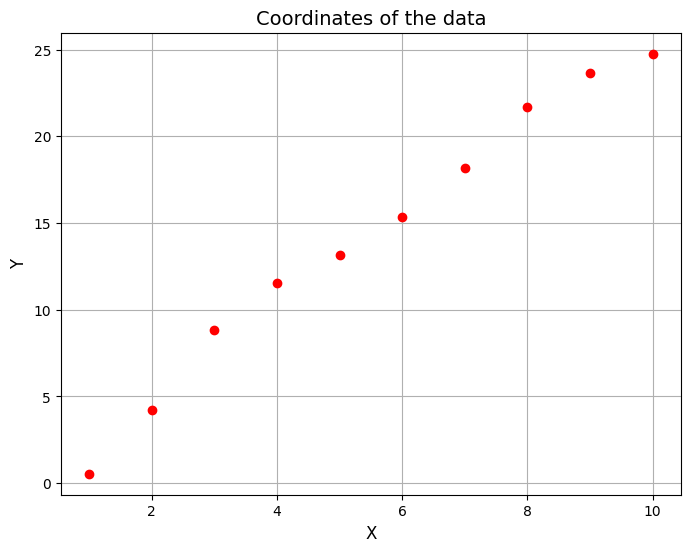

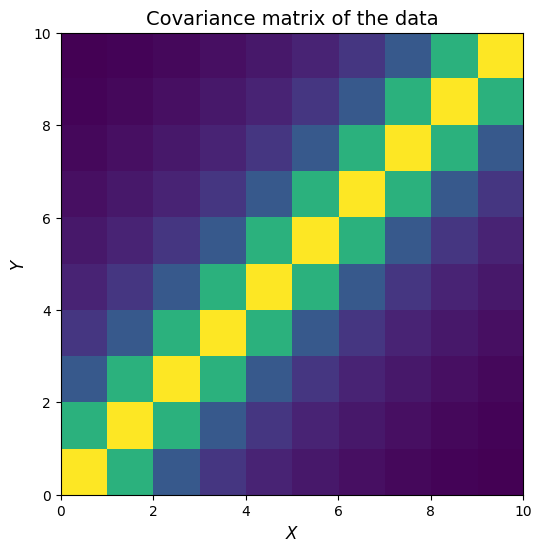

In [19]:
# Plots
# Data points
plt.figure(figsize=(8, 6))
plt.plot(X_points,Y_points, color='red', marker="o", linestyle = 'None')#, markersize=10)
plt.title('Coordinates of the data', fontsize=14)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.grid()
plt.show()
# Covariance matrix
plt.figure(figsize=(6, 6))
plt.imshow(data_cov, cmap='viridis', origin='lower', extent=(0, X_points.shape[0], 0, Y_points.shape[0]))
plt.title('Covariance matrix of the data', fontsize=14)
plt.xlabel('$X$', fontsize=12)
plt.ylabel('$Y$', fontsize=12)
plt.show()

4) Use the diagonal terms of the covariance matrix as the variance of each 10 Y points and do the same plot as in 3) but including the error bars (have to be the square root of the variance ;) ). We recommand to use plt.errorbar

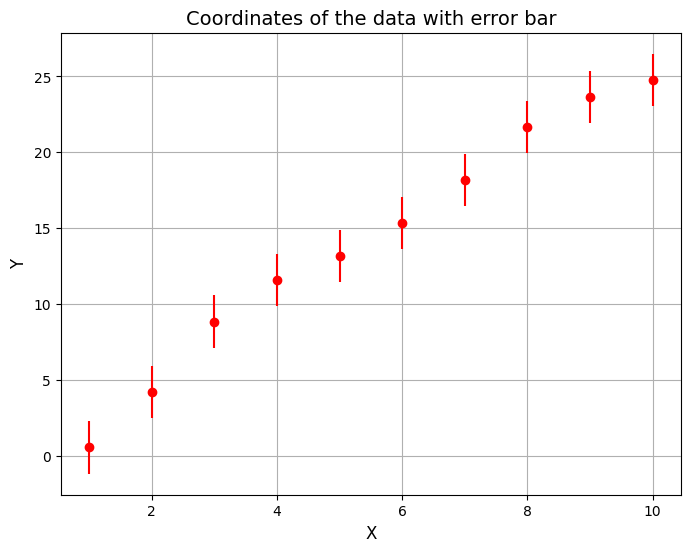

In [20]:
# Error bar (standar desviation)
error_bars = np.sqrt(np.diag(data_cov)) # Taking the sqrt of the variance to get the standar desviation
# Plot data points with error bar
plt.figure(figsize=(8, 6))
plt.errorbar(X_points,Y_points, error_bars, color='red', marker="o", linestyle = 'None')#, markersize=10)
plt.title('Coordinates of the data with error bar', fontsize=14)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.grid()
plt.show()

#### 1.2 Find best fit parameters

5) Create 2 arrays, named A_arr and B_arr, of values spaced by 0.1 between -5 and 5. 

5) (bis) Create a Covariance matrix that only contain the diagonal part of the real covariance matrix that we can name here $Cov_D$. It will allow to do the same work but ignoring the covariance between the data points.

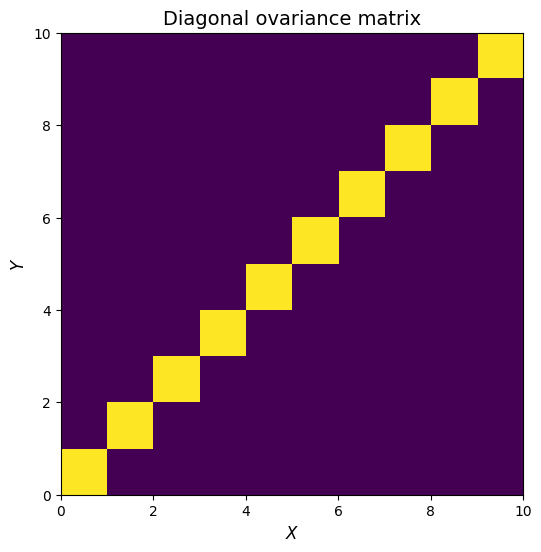

In [21]:
A_arr = np.arange(-5,5, 0.1)
B_arr = np.arange(-5,5, 0.1)
# Covariance matrix diagonal
Cov_D = np.zeros((data_cov.shape))
for i in range(data_cov.shape[0]):
    for j in range(data_cov.shape[1]):
        if i == j:
            Cov_D[i,j] = data_cov[i,j]
# Plot covariance matrix diagonal
plt.figure(figsize=(6, 6))
plt.imshow(Cov_D, cmap='viridis', origin='lower', extent=(0, X_points.shape[0], 0, Y_points.shape[0]))
plt.title('Diagonal ovariance matrix', fontsize=14)
plt.xlabel('$X$', fontsize=12)
plt.ylabel('$Y$', fontsize=12)
plt.show()

6) Generate a 2D-array, named chi2_arr, full of 0. with size (len(A_arr), len(B_arr)). Generate another identical 2D-array, named chi2_arr_diag.

7) Using a double loop, evaluate at each point of the chi2_arr[ii,jj] the value of the $\chi^2 = \frac{1}{2}\vec{V}^TCov^{-1}\vec{V}$ where $\vec{V}$ is the array of 10 elements (A_arr[ii] * X + B_arr[jj] - Y)

7) (bis) Using a double loop, evaluate at each point of the chi2_arr_diag[ii,jj] the value of the $\chi_D^2 = \frac{1}{2}\vec{V}^TCov_D^{-1}\vec{V}$ where $Cov_D$ is the diagonal of the covariance matrix generated in 5 bis)

In [22]:
# Chi2 arrays
chi2_arr = np.zeros((len(A_arr),len(B_arr)))
chi2_arr_diag = np.zeros((len(A_arr),len(B_arr)))
# Calculate chi2
for i in range(len(A_arr)):
    for j in range(len(B_arr)):
        V_arr = A_arr[i]*X_points + B_arr[j] - Y_points
        chi2_arr[i,j]=(1/2)*np.dot((V_arr).T,np.dot(np.linalg.inv(data_cov),(V_arr)))
# Calculate chi2_diag
for i in range(len(A_arr)):
    for j in range(len(B_arr)):
        V_arr = A_arr[i]*X_points + B_arr[j] - Y_points
        chi2_arr_diag[i,j]=(1/2)*np.dot((V_arr).T,np.dot(np.linalg.inv(Cov_D),(V_arr)))

8) Find the best fit parameters $(A_{best},B_{best})$ which correspond to the minimum of chi2_arr. What is the value of this best $\chi^2/N_{dof}$? Is it acceptable?

In [23]:
# Identifica en que entrada del array chi2 está el mínimo
chi2_min_index = np.where(chi2_arr == np.min(chi2_arr))
# Toma el valor min de chi2 para A & B
A_bf = A_arr[chi2_min_index[0][0]]
B_bf = B_arr[chi2_min_index[1][0]]
# Best fit A & B
print(f'(A,B) best fit: ({A_bf},{B_bf})')

(A,B) best fit: (2.6999999999999726,-1.0000000000000142)


Using:

\begin{align*}
\chi^2 \rightarrow& N_{dof} = N_{pts} - N_{params}\\
\Delta\chi^2 \rightarrow& N_{dof} = N_{params}
\end{align*}

so, in this case $N_{dof} = 2$

In [24]:
N_dof = 2 # num. of degrees of freedom is the # of observations - # fitted params.
aceptable = np.min(chi2_arr)/N_dof
print('The value of chi2/N_dof is {}'.format(aceptable))

The value of chi2/N_dof is 1.029907940347452


8) (bias) Find the best fit parameters  $(A^D_{best},B^D_{best})$ which correspond to the minimum of chi2_arr_diag.

In [25]:
# Identifica en que entrada del array chi2_diag está el mínimo
chi2_min_indexD = np.where(chi2_arr_diag == np.min(chi2_arr_diag))
# Toma el valor min de chi2_diag para A & B
A_bfD = A_arr[chi2_min_indexD[0][0]]
B_bfD = B_arr[chi2_min_indexD[1][0]]
# Best fit A & B  usando covarianza diagonal
print(f'(A,B) best fit diag: ({A_bfD},{B_bfD})')# '\n B best fit:', B_bf)#, '\n corresponding to the indices', indices_ABmin)

(A,B) best fit diag: (2.6999999999999726,-0.7000000000000153)


9) Plot one more time X, Y with errorbar() and add the best fit model using the whole covariance matrix information and the best fit model using only the diagonal of the covariance matrix.

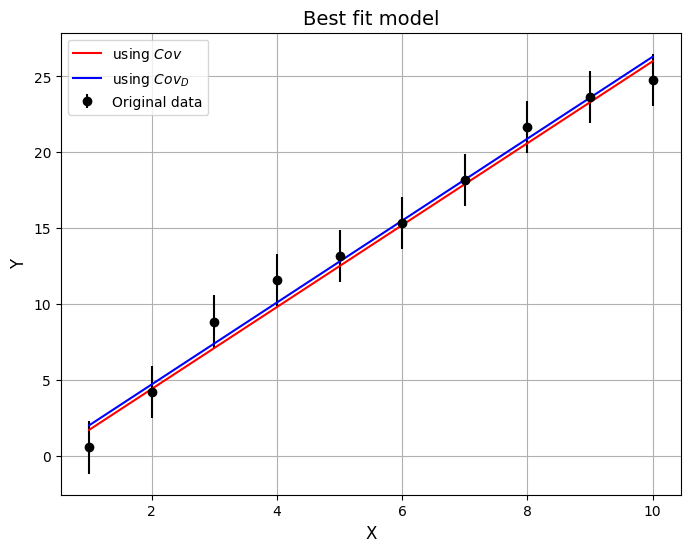

In [26]:
f = A_bf*X_points + B_bf
f_D = A_bfD*X_points + B_bfD

plt.figure(figsize=(8, 6))
plt.errorbar(X_points,Y_points, error_bars, color='black', marker="o", linestyle = 'None', markersize=6, label=r'Original data')
plt.plot(X_points, f, color='red', label=r'using $Cov$')
plt.plot(X_points, f_D, color='blue', label=r'using $Cov_D$')
plt.legend()
plt.title('Best fit model', fontsize=14)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.grid()
plt.show()

#### 1.3 Confidence contours

One time you have found the best fit, you want to obtain obtain the confidence region. To do that, you have to
considerate the $\Delta\chi^2=\chi^2-min(\chi^2)$ and consider the values for 2 parameters for $1, 2, 3\sigma$

10) Generate a new 2D array, named Delta_chi2_arr, equal to chi2_arr-np.min(chi2_arr) and another one for the diagonal information Delta_chi2_arr_diag, equal to chi2_arr_diag-np.min(chi2_arr_diag)

In [27]:
Delta_chi2_arr = chi2_arr - np.min(chi2_arr)
Delta_chi2_arr_diag = chi2_arr_diag - np.min(chi2_arr_diag)

11) Do a pcolormesh of these new array and add a marker at the best parameters value position for both.

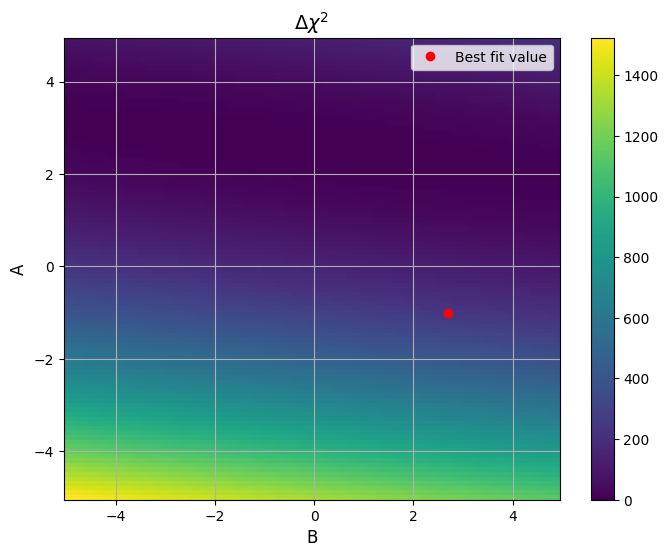

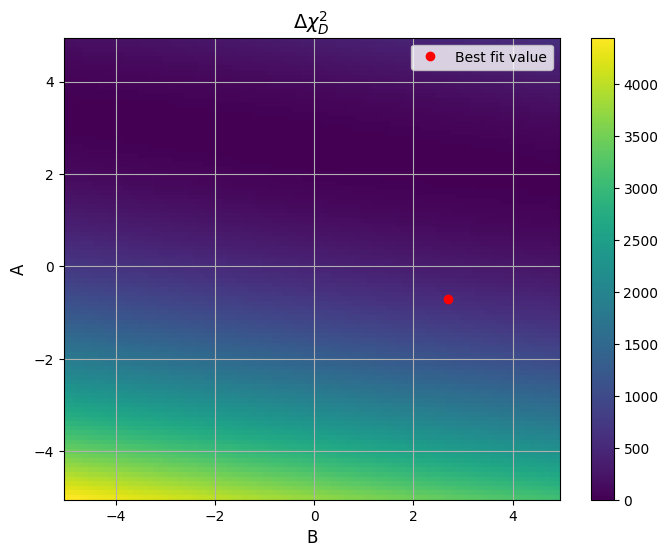

In [28]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(A_arr, B_arr,Delta_chi2_arr)
plt.plot(A_arr[chi2_min_index[0][0]], B_arr[chi2_min_index[1][0]], 'o', color='r', label=r'Best fit value')
plt.colorbar()
plt.title(r'$\Delta \chi^2$', size=14)
plt.xlabel('B', size=12)
plt.ylabel('A', size=12)
plt.legend(fontsize=10)
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
plt.pcolormesh(A_arr, B_arr,Delta_chi2_arr_diag)
plt.plot(A_arr[chi2_min_indexD[0][0]], B_arr[chi2_min_indexD[1][0]], 'o', color='r', label=r'Best fit value')
plt.colorbar()
plt.title(r'$\Delta \chi^2_{D}$', size=14)
plt.xlabel('B', size=12)
plt.ylabel('A', size=12)
plt.legend(fontsize=10)
plt.grid()
plt.show()

12) Using the values for 2 parameters for 1; 2; 3 $\sigma$, generate the contour plot for these 3 values for the whole information and the diagonal information. The real values we used to generate the data points are A_real=2.7 and B_real=-2.3. Add a marker on the contour plot.

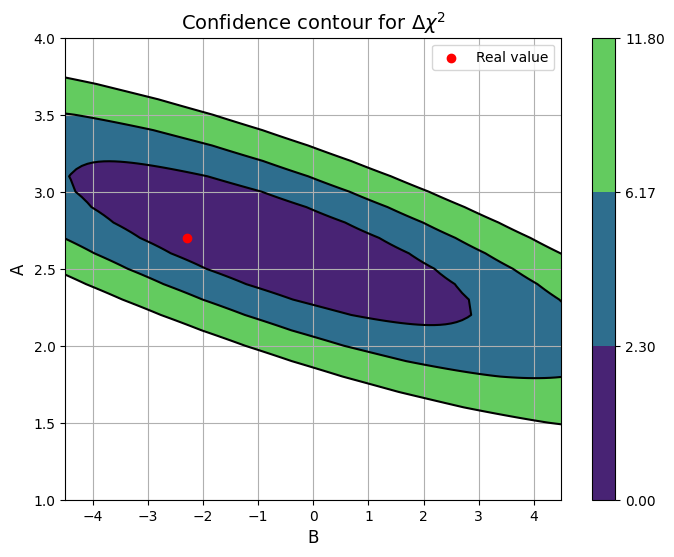

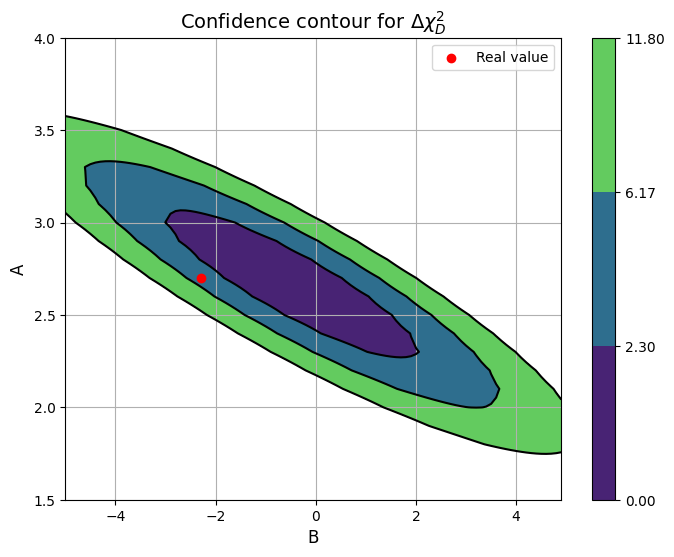

In [29]:
A_real = 2.7 
B_real = -2.3

plt.figure(figsize=(8, 6))
plt.contour(A_arr, B_arr, Delta_chi2_arr, levels = [2.3, 6.17, 11.8], colors='k')
plt.contourf(A_arr, B_arr, Delta_chi2_arr, levels=[0,2.3, 6.17, 11.8])#, cmap='viridis_r')
plt.colorbar()
plt.title('Confidence contour for $\Delta \chi^2$', size=14)
plt.xlabel('B', size=12)
plt.ylabel('A', size=12)
plt.scatter(B_real, A_real, color='r', label=r'Real value')
plt.legend(fontsize=10)
plt.xlim(-4.5,4.5)
plt.ylim(1,4)
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
plt.contour(A_arr, B_arr, Delta_chi2_arr_diag, levels = [2.3, 6.17, 11.8], colors='k')
plt.contourf(A_arr, B_arr, Delta_chi2_arr_diag, levels=[0,2.3, 6.17, 11.8])
plt.colorbar()
plt.title('Confidence contour for $\Delta \chi^2_{D}$', size=14)
plt.xlabel('B', size=12)
plt.ylabel('A', size=12)
plt.scatter(B_real, A_real, color='r', label=r'Real value')
plt.legend(fontsize=10)
plt.xlim(-5,4.9)
plt.ylim(1.5,4)
plt.grid()
plt.show()

## 2 Exercise : Calculate p-values for distinct $\chi^2$

You will generate the probability distribution function, using the gamma and incomplete gamma functions, for
the $\chi^2$ for different number of degree of freedom. Calculate the p-values for the corresponding best $\chi^2$ values,
which correspond to results we get in our last analysis:

1) $\chi^2 = 25.1$ for $N_{dof}=16$ 
2) $\chi^2 = 25.0$ for $N_{dof}=18$ 
3) $\chi^2 = 41.5$ for $N_{dof}=20$ 
4) $\chi^2 = 30.3$ for $N_{dof}=23$ 
5) $\chi^2 = 28.1$ for $N_{dof}=25$ 
6) $\chi^2 = 60.1$ for $N_{dof}=33$ 

In [30]:
# Xi2 para cada caso
chi2_1=25.1
chi2_2=25
chi2_3=41.5
chi2_4=30.3
chi2_5=28.1
chi2_6=60.1
# N_dof para cada caso
N_dof1=16
N_dof2=18
N_dof3=20
N_dof4=23
N_dof5=25
N_dof6=33

We will define the probability function as
$$
\begin{split}
P(\chi^2,n) & = \frac{2^{-n/2}}{\Gamma (n/2)} \chi^{n-2} e^{-\chi^2 /2} \\
& = \frac{2^{-n/2}}{\Gamma (n/2)} (\chi^2)^{n/2 - 1} e^{-\chi^2 /2}
\end{split}
$$

The cumulative distribution function $P$ of a pdf $p$ with $N_{dof}$ degrees of freedom and values of $\chi^2$ is given by:

$$
P_{N_{dof}}(Y\leq \chi^2) = \frac{\gamma(N_{dof}/2,\chi^2/2)}{\Gamma(N_{dof}/2)}
$$

In [31]:
# Calculo de la CDF
P1 = sp.special.gammainc(N_dof1/2, chi2_1/2)
P2 = sp.special.gammainc(N_dof2/2, chi2_2/2)
P3 = sp.special.gammainc(N_dof3/2, chi2_3/2)
P4 = sp.special.gammainc(N_dof4/2, chi2_4/2)
P5 = sp.special.gammainc(N_dof5/2, chi2_5/2)
P6 = sp.special.gammainc(N_dof6/2, chi2_6/2)

Now, what we have to compute is the integral of this CDF form 0 to chi2 as

$$
I = \int_0^{\chi^{2}}\text{pdf}(\chi^2)d\chi^2
$$

but, in fact, the previous $P(N_{dof}/2,\chi^2/2)$ is indeed the CDF yet, so, we can do directly the substraction due to the p-values will be given by

$$
\text{p-value} = 1-I
$$

In [32]:
# Finally, the p-values are, respectively
p_val1 = 1 - P1
p_val2 = 1 - P2
p_val3 = 1 - P3
p_val4 = 1 - P4
p_val5 = 1 - P5
p_val6 = 1 - P6

print('The corresponding p-values are: \n\n p-val1 =', p_val1, '\n\n p-val2 =', p_val2, '\n\n p-val3 =', p_val3, '\n\n p-val4 =', p_val4, '\n\n p-val5 =', p_val5, '\n\n p-val6 =', p_val6)

The corresponding p-values are: 

 p-val1 = 0.06808184251741012 

 p-val2 = 0.12491619694467049 

 p-val3 = 0.0032115047864634816 

 p-val4 = 0.1409819481985377 

 p-val5 = 0.3032702860847618 

 p-val6 = 0.002696810267838523
